In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
df=pd.read_csv('titanic-passengers.csv', sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.isnull().sum().sum()

866

In [7]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.isnull().sum(),df['Age'].describe()


(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 count    891.000000
 mean      29.699118
 std       13.002015
 min        0.420000
 25%       22.000000
 50%       29.699118
 75%       35.000000
 max       80.000000
 Name: Age, dtype: float64)

In [9]:
print(df["Cabin"].value_counts())

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64


In [10]:
df["Cabin"].fillna('G6',inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [11]:
print(df["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [12]:
df["Embarked"].fillna('S',inplace=True)
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
#df['Survived']=LabelEncoder().fit_transform(df['Survived'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S


In [14]:
#phase2

<AxesSubplot:title={'center':'Histogram based on age'}, xlabel='Age', ylabel='Frequency'>

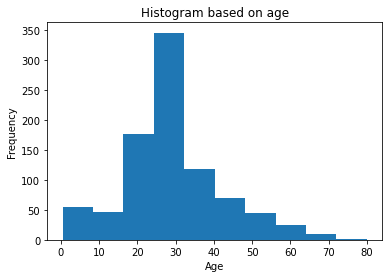

In [15]:
plt.title("Histogram based on age")
plt.xlabel("Age")
df['Age'].plot.hist()

<AxesSubplot:title={'center':'Bar plot based on sex'}, xlabel='Sex', ylabel='Sex value count'>

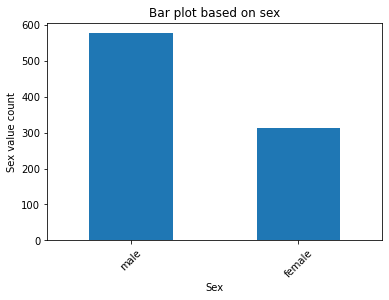

In [16]:
plt.xlabel("Sex")
plt.ylabel("Sex value count")
plt.title("Bar plot based on sex")
vc=df['Sex'].value_counts()
vc.plot.bar(rot=45)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

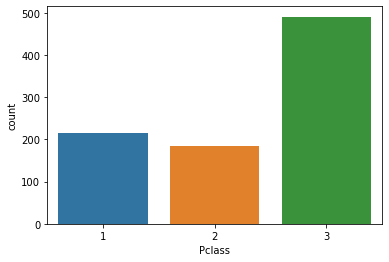

In [17]:
sns.countplot(x='Pclass',data=df)

<AxesSubplot:title={'center':'Bar plot based on survival'}, xlabel='Survived', ylabel='Survival value count'>

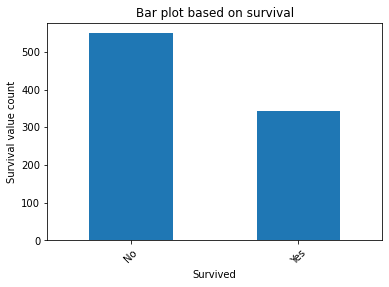

In [18]:
plt.xlabel("Survived")
plt.ylabel("Survival value count")
plt.title("Bar plot based on survival")
vc=df['Survived'].value_counts()
vc.plot.bar(rot=45)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

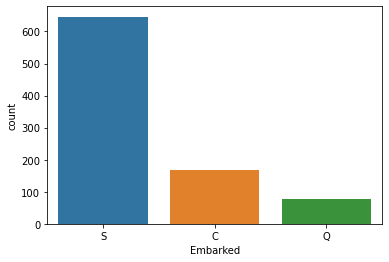

In [19]:
sns.countplot(x='Embarked',data=df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

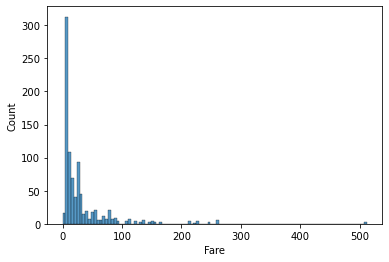

In [20]:
sns.histplot(df['Fare'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

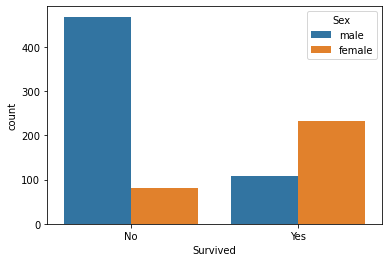

In [21]:
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Age', ylabel='Sex'>

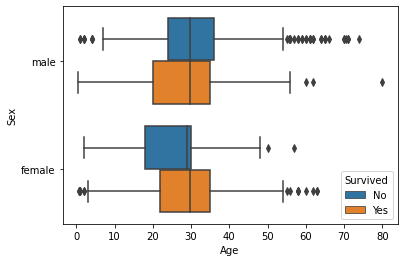

In [22]:
sns.boxplot(data=df, x='Age', y='Sex', hue ='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

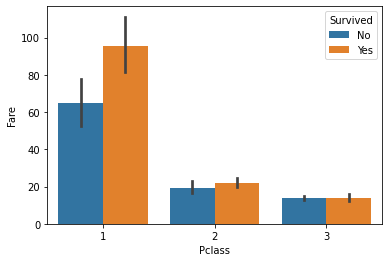

In [23]:
sns.barplot(data=df, x='Pclass', y='Fare', hue ='Survived')

In [24]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

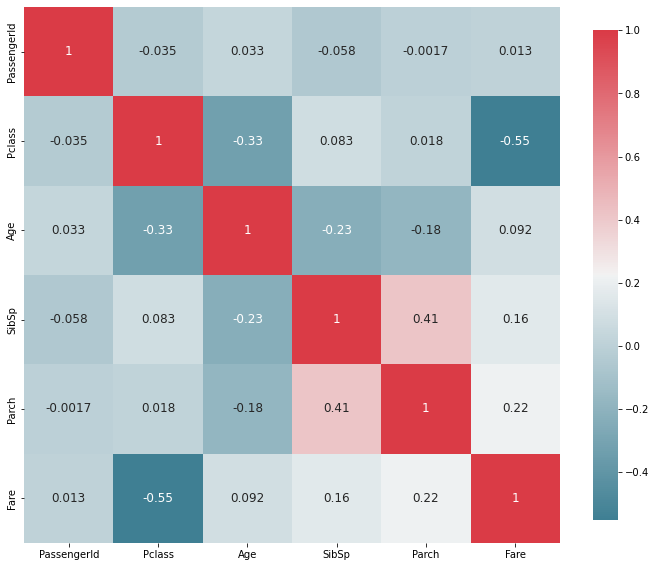

In [25]:
plot_correlation_map( df )

In [26]:
"""
The function creates a correlation matrix from our dataframe to generate a heat map.The heatmap shows us the correlation
between the variables in the data set. The variation in colors represents different levels of correlation.
"""

'\nThe function creates a correlation matrix from our dataframe to generate a heat map.The heatmap shows us the correlation\nbetween the variables in the data set. The variation in colors represents different levels of correlation.\n'

In [27]:
cleanup={"Survived":{"Yes":1, "No": 0}}  # at first, let's convert Survived to numerical format
df.replace(cleanup, inplace=True)
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [28]:
#df=df.drop('Name',axis=1)
df=df.drop('PassengerId',axis=1)
df=df.drop('Ticket',axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,13.0000,G6,S
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,7.6500,F G73,S
2,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,7.8542,G6,S
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,21.0750,G6,S
4,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,G6,C
887,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,7.2292,G6,C
888,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,8.6625,G6,S
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,7.8958,G6,S


In [29]:
df['Title'] = df['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0]
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,13.0000,G6,S,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,7.6500,F G73,S,Mr
2,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,7.8542,G6,S,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,21.0750,G6,S,Mrs
4,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,G6,C,Mrs
887,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,7.2292,G6,C,Mr
888,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,8.6625,G6,S,Miss
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,7.8958,G6,S,Mr


In [30]:
titles = sorted(pd.concat([df['Title'], df['Title']]).unique())
print(titles)

[' Capt', ' Col', ' Don', ' Dr', ' Jonkheer', ' Lady', ' Major', ' Master', ' Miss', ' Mlle', ' Mme', ' Mr', ' Mrs', ' Ms', ' Rev', ' Sir', ' the Countess']


In [31]:
df=df.drop('Name',axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,2,male,28.000000,0,0,13.0000,G6,S,Mr
1,0,3,male,25.000000,0,0,7.6500,F G73,S,Mr
2,0,3,male,20.000000,0,0,7.8542,G6,S,Mr
3,0,3,female,29.000000,0,4,21.0750,G6,S,Mrs
4,0,1,male,31.000000,1,0,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,1,2,female,14.000000,1,0,30.0708,G6,C,Mrs
887,0,3,male,22.000000,0,0,7.2292,G6,C,Mr
888,0,3,female,30.000000,0,0,8.6625,G6,S,Miss
889,0,3,male,29.699118,0,0,7.8958,G6,S,Mr


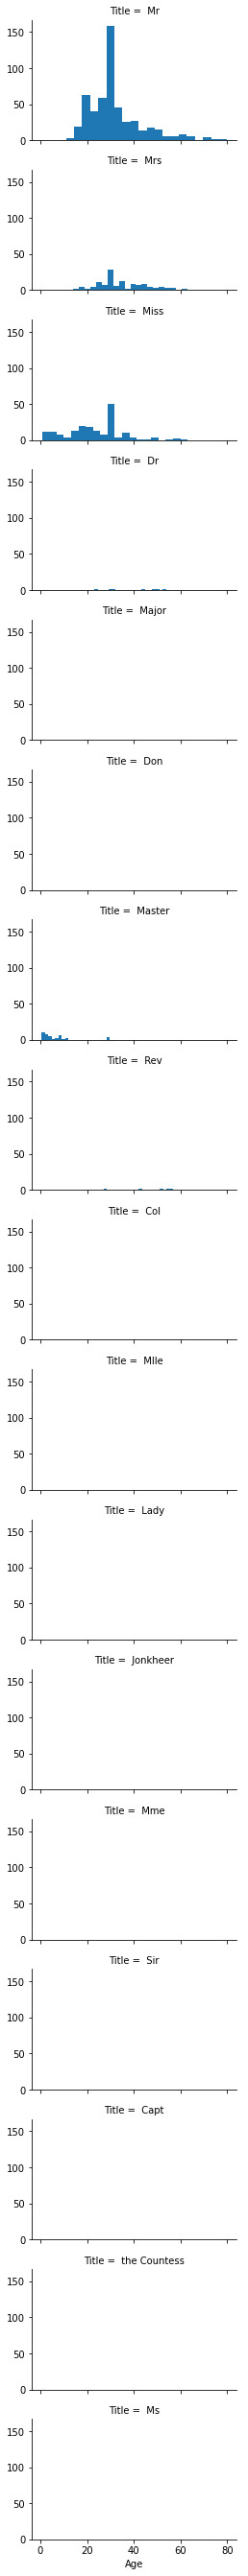

In [32]:
grid = sns.FacetGrid(df,row="Title", height=2.2, aspect=1.6)
grid.map(plt.hist, "Age",bins=20)
grid.add_legend()

<AxesSubplot:xlabel='count', ylabel='Title'>

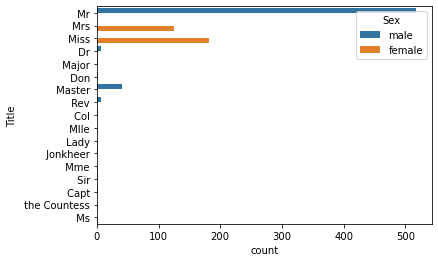

In [33]:
sns.countplot(y='Title',data=df,hue='Sex')



<AxesSubplot:xlabel='Title', ylabel='Fare'>

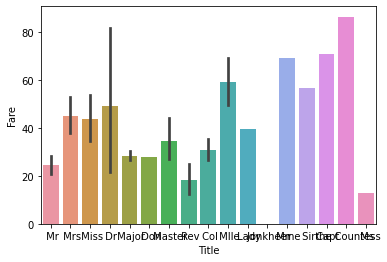

In [34]:
sns.barplot(data=df, x='Title', y='Fare')

In [35]:
df['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Don               1
 Lady              1
 Jonkheer          1
 Mme               1
 Sir               1
 Capt              1
 the Countess      1
 Ms                1
Name: Title, dtype: int64

In [36]:
Title_Dictionary = { "Title" :{"Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"}}                
df.replace(Title_Dictionary, inplace=True,regex=True)
clean = {"Title" : {"Mrss" : "Mrs" }}
df.replace(clean, inplace=True,regex=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,2,male,28.000000,0,0,13.0000,G6,S,Mrs
1,0,3,male,25.000000,0,0,7.6500,F G73,S,Mrs
2,0,3,male,20.000000,0,0,7.8542,G6,S,Mrs
3,0,3,female,29.000000,0,4,21.0750,G6,S,Mrs
4,0,1,male,31.000000,1,0,52.0000,B71,S,Mrs
...,...,...,...,...,...,...,...,...,...,...
886,1,2,female,14.000000,1,0,30.0708,G6,C,Mrs
887,0,3,male,22.000000,0,0,7.2292,G6,C,Mrs
888,0,3,female,30.000000,0,0,8.6625,G6,S,Miss
889,0,3,male,29.699118,0,0,7.8958,G6,S,Mrs


In [37]:
titles = sorted(pd.concat([df['Title'], df['Title']]).unique())
print(titles)

[' Master', ' Miss', ' Mrs', ' Officer', ' Royalty']


In [38]:
df['Title'].value_counts()

 Mrs        643
 Miss       185
 Master      40
 Officer     18
 Royalty      5
Name: Title, dtype: int64

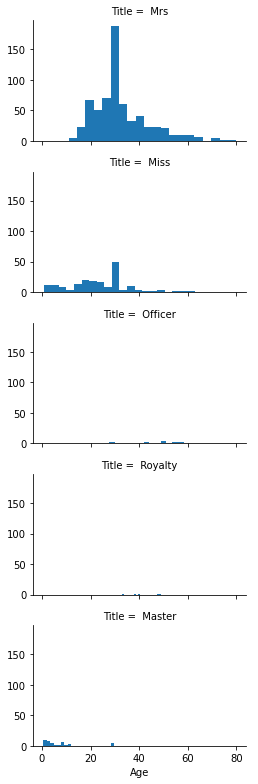

In [39]:
grid = sns.FacetGrid(df,row="Title", height=2.2, aspect=1.6)
grid.map(plt.hist, "Age",bins=20)
grid.add_legend()

<AxesSubplot:xlabel='count', ylabel='Title'>

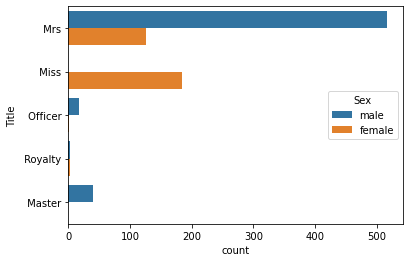

In [40]:
sns.countplot(y='Title',data=df,hue='Sex')

<AxesSubplot:xlabel='Title', ylabel='Fare'>

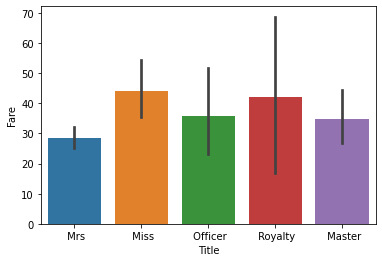

In [41]:
sns.barplot(data=df, x='Title', y='Fare')

In [42]:
df['FamilySize']=df['SibSp'] + df['Parch']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,0,2,male,28.000000,0,0,13.0000,G6,S,Mrs,0
1,0,3,male,25.000000,0,0,7.6500,F G73,S,Mrs,0
2,0,3,male,20.000000,0,0,7.8542,G6,S,Mrs,0
3,0,3,female,29.000000,0,4,21.0750,G6,S,Mrs,4
4,0,1,male,31.000000,1,0,52.0000,B71,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,female,14.000000,1,0,30.0708,G6,C,Mrs,1
887,0,3,male,22.000000,0,0,7.2292,G6,C,Mrs,0
888,0,3,female,30.000000,0,0,8.6625,G6,S,Miss,0
889,0,3,male,29.699118,0,0,7.8958,G6,S,Mrs,0


<AxesSubplot:title={'center':'Histogram based on family size'}, xlabel='FamilySize', ylabel='Frequency'>

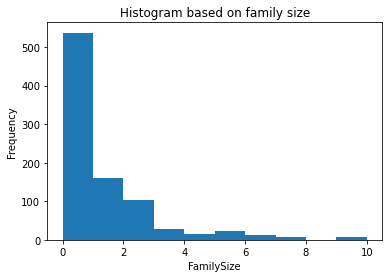

In [43]:
plt.title("Histogram based on family size")
plt.xlabel("FamilySize")
df['FamilySize'].plot.hist()

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

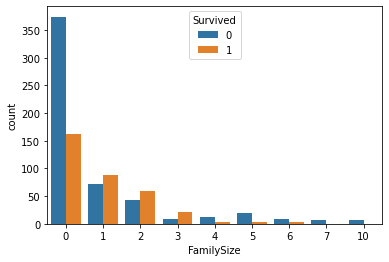

In [44]:
sns.countplot(x='FamilySize',hue='Survived',data=df)

In [45]:
"""
Families with three of less members had a better chance of surviving. Again, family size greater that four significantly
impacted the chances of survival. Passengers that were by themselves were more likely to die.
"""

'\nFamilies with three of less members had a better chance of surviving. Again, family size greater that four significantly\nimpacted the chances of survival. Passengers that were by themselves were more likely to die.\n'

In [49]:
#Converting Sex to numerical 
cleanup_nums={ "Sex" : {"female":0,"male":1}}
df.replace(cleanup_nums,inplace=True)

In [50]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,0,2,1,28.0,0,0,13.0000,G6,S,Mrs,0
1,0,3,1,25.0,0,0,7.6500,F G73,S,Mrs,0
2,0,3,1,20.0,0,0,7.8542,G6,S,Mrs,0
3,0,3,0,29.0,0,4,21.0750,G6,S,Mrs,4
4,0,1,1,31.0,1,0,52.0000,B71,S,Mrs,1


In [51]:
x= df[['Pclass','Sex','Age','Fare','FamilySize']]
y=df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)  
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))  #testing model’s performance

Accuracy=0.83


<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

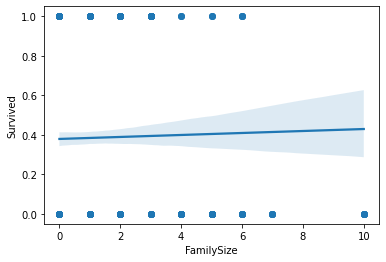

In [53]:
sns.regplot(x='FamilySize',y='Survived',data=df)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

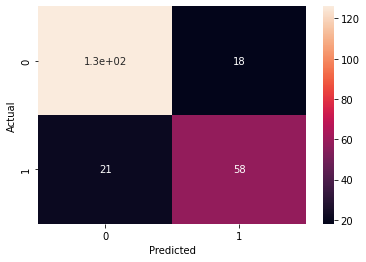

In [54]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       144
           1       0.76      0.73      0.75        79

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223



In [57]:
# calculate scores
y_auc = roc_auc_score(y_test, y_pred)

# summarize scores
print('Logistic: ROC AUC=%.3f' % (y_auc))

# calculate roc curves
y_fpr, y_tpr, _ = roc_curve(y_test, y_pred)

Logistic: ROC AUC=0.805


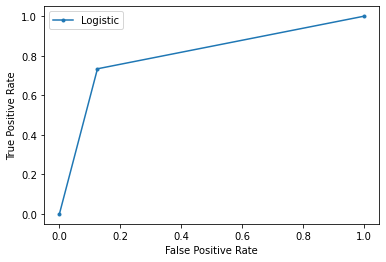

In [59]:
# plot the roc curve for the model
plt.plot(y_fpr, y_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()